In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torch.autograd import Variable
from PIL import Image
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyper-parameters
input_size = 784 # 28x28
batch_size = 64


# Load the dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
new_train_dataset = torch.tensor(np.random.randint(0, 10, (len(train_dataset)),))
train_dataset.targets = new_train_dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)


## Model 1
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 12)
        self.fc3 = nn.Linear(12, 10)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

def train_mod(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0
    counter = 0

    for batch_idx, (data, target) in enumerate(train_loader):
        counter += 1
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()


        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

        train_loss += loss.data

        predicted = np.argmax(output.data, axis=1)
        correct += np.equal(predicted, target.data).sum()

    train_loss = (train_loss * 100) / len(train_loader.dataset) #(train_loss ) / len(train_loader)
    accuracy = 100.0 * correct / len(train_loader)
    return train_loss, accuracy

def test_mod(model, epoch, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    for data, target in test_loader:
        data, target = Variable(data), Variable(target)

        output = model(data)
        loss = criterion(output, target)
        test_loss += loss.data

        predicted = np.argmax(output.data, axis = 1)
        correct = correct + np.equal(predicted, target.data).sum()


    test_loss =  (test_loss * 100) / len(test_loader.dataset) #(test_loss ) / len(test_loader)
    return test_loss

model = Model1()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=0.0001)
train_loss_mod1 = []
test_loss_mod1 = []

n_epo = 10
criterion = torch.nn.CrossEntropyLoss()
for epoch in range(1, n_epo + 1):
    train_losses, acc = train_mod(model, optimizer, train_loader)
    train_loss_mod1.append(train_losses)
    test_losses = test_mod(model, epoch, test_loader)
    test_loss_mod1.append(test_losses)
    print(f"Epoch {epoch}, Train Loss: {train_losses:.4f} , Test Loss: {test_losses:.4f}")


train = []
for i in train_loss_mod1:
    train.append(i.data.numpy().tolist())
test = []
for i in test_loss_mod1:
    test.append(i.data.numpy().tolist())

100%|██████████| 9912422/9912422 [00:00<00:00, 85261473.43it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 68709979.48it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 28604777.17it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13174639.54it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1, Train Loss: 3.6045 , Test Loss: 3.6288
Epoch 2, Train Loss: 3.6005 , Test Loss: 3.6222
Epoch 3, Train Loss: 3.5994 , Test Loss: 3.6281
Epoch 4, Train Loss: 3.5990 , Test Loss: 3.6247
Epoch 5, Train Loss: 3.5983 , Test Loss: 3.6323
Epoch 6, Train Loss: 3.5982 , Test Loss: 3.6309
Epoch 7, Train Loss: 3.5971 , Test Loss: 3.6298
Epoch 8, Train Loss: 3.5965 , Test Loss: 3.6178
Epoch 9, Train Loss: 3.5958 , Test Loss: 3.6233
Epoch 10, Train Loss: 3.5948 , Test Loss: 3.6350


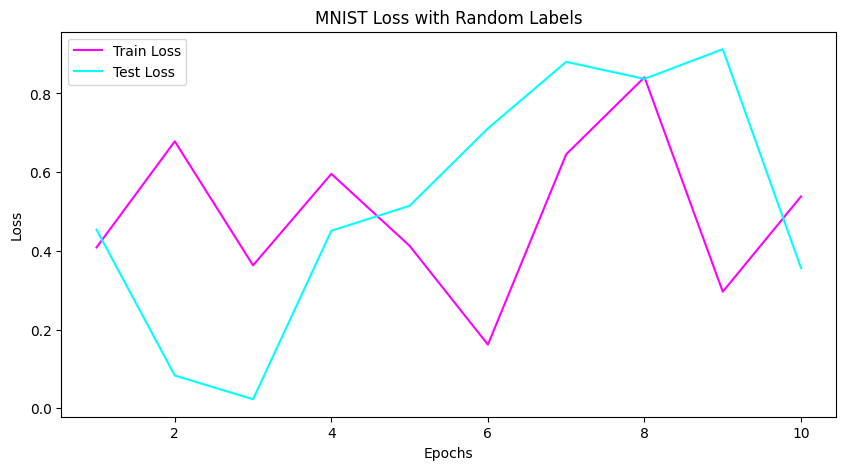

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Hypothetical train and test arrays with 50 elements each
# These should contain the loss values for each epoch
train = np.random.rand(10)  # Replace with your actual train loss data
test = np.random.rand(10)   # Replace with your actual test loss data

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, 11, 1), train, label='Train Loss', color='magenta')  # Magenta color for train loss
plt.plot(np.arange(1, 11, 1), test, label='Test Loss', color='cyan')       # Cyan color for test loss
plt.title('MNIST Loss with Random Labels')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()



In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np
import matplotlib.pyplot as plt

# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyper-parameters
input_size = 784
batch_size = 64

# Load the dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
new_train_dataset = torch.tensor(np.random.randint(0, 10, (len(train_dataset),)))
train_dataset.targets = new_train_dataset
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

# Common training and testing functions
def train_model(model, optimizer, train_loader):
    model.train()
    correct = 0
    train_loss = 0

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data.view(-1, 28 * 28))
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
        _, predicted = output.max(1)
        correct += predicted.eq(target).sum().item()

    train_loss /= len(train_loader.dataset)
    accuracy = correct / len(train_loader.dataset) * 100
    return train_loss, accuracy

def test_model(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in test_loader:
            output = model(data.view(-1, 28 * 28))
            test_loss += criterion(output, target).item()
            _, predicted = output.max(1)
            correct += predicted.eq(target).sum().item()

    test_loss /= len(test_loader.dataset)
    accuracy = correct / len(test_loader.dataset) * 100
    return test_loss, accuracy

# Define model structures with varying parameters
class Model(nn.Module):
    def __init__(self, hidden_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 32)
        self.fc3 = nn.Linear(32, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Training configurations
n_epochs = 5
learning_rate = 0.001
criterion = nn.CrossEntropyLoss()

# Different models with varying parameters
model_params = [200, 500, 800, 1000, 1200, 1500, 1800, 2000, 2500, 3000]
train_losses = [[] for _ in range(len(model_params))]
test_losses = [[] for _ in range(len(model_params))]
train_accuracies = [[] for _ in range(len(model_params))]
test_accuracies = [[] for _ in range(len(model_params))]

for i, hidden_size in enumerate(model_params):
    model = Model(hidden_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    for epoch in range(n_epochs):
        train_loss, train_accuracy = train_model(model, optimizer, train_loader)
        test_loss, test_accuracy = test_model(model, test_loader)

        train_losses[i].append(train_loss)
        test_losses[i].append(test_loss)
        train_accuracies[i].append(train_accuracy)
        test_accuracies[i].append(test_accuracy)

        print(f"Model {i+1}, Epoch {epoch + 1}/{n_epochs}, Train Loss: {train_loss:.4f}, "
              f"Test Loss: {test_loss:.4f}, Train Accuracy: {train_accuracy:.2f}%, "
              f"Test Accuracy: {test_accuracy:.2f}%")


Model 1, Epoch 1/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.07%, Test Accuracy: 10.19%
Model 1, Epoch 2/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.14%, Test Accuracy: 10.31%
Model 1, Epoch 3/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.37%, Test Accuracy: 10.43%
Model 1, Epoch 4/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.37%, Test Accuracy: 10.69%
Model 1, Epoch 5/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.48%, Test Accuracy: 11.41%
Model 2, Epoch 1/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.25%, Test Accuracy: 9.74%
Model 2, Epoch 2/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.13%, Test Accuracy: 9.74%
Model 2, Epoch 3/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.18%, Test Accuracy: 10.09%
Model 2, Epoch 4/5, Train Loss: 0.0360, Test Loss: 0.0362, Train Accuracy: 10.30%, Test Accuracy: 9.82%
Model 2, Epoch 5/5, Train Loss: 0.0360, Test Loss: 0.0362,

In [ ]:
plt.figure(figsize=(12, 8))
for i, hidden_size in enumerate(model_params):
    model = Model(hidden_size)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model for one epoch
    train_loss, train_accuracy = train_model(model, optimizer, train_loader)

    # Extracting weights from the model
    fc1_weights = model.fc1.weight.view(-1).detach().numpy()
    fc2_weights = model.fc2.weight.view(-1).detach().numpy()
    fc3_weights = model.fc3.weight.view(-1).detach().numpy()

    # Plotting the weights
    plt.subplot(3, len(model_params)//3 + 1, i+1)
    plt.hist(fc1_weights, bins=20, alpha=0.5, label='FC1')
    plt.hist(fc2_weights, bins=20, alpha=0.5, label='FC2')
    plt.hist(fc3_weights, bins=20, alpha=0.5, label='FC3')
    plt.title(f'Hidden Size: {hidden_size}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
for i, hidden_size in enumerate(model_params):
    plt.plot(range(1, n_epochs + 1), train_losses[i], marker='o', label=f'Train Model {i+1} (hidden size: {hidden_size})')
    plt.plot(range(1, n_epochs + 1), test_losses[i], marker='o', label=f'Test Model {i+1} (hidden size: {hidden_size})')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Testing Losses')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))

for i, hidden_size in enumerate(model_params):
    plt.plot(range(1, n_epochs + 1), train_accuracies[i], marker='o', label=f'Train Model {i+1} (hidden size: {hidden_size}) - Accuracy')
    plt.plot(range(1, n_epochs + 1), test_accuracies[i], marker='o', label=f'Test Model {i+1} (hidden size: {hidden_size}) - Accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Testing Accuracies')
plt.legend()
plt.grid(True)
plt.show()



100%|██████████| 9912422/9912422 [00:00<00:00, 68083239.85it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 79642139.27it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25541477.47it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 13774785.80it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



LR: 0.001, Epoch [1/10], Train Loss: 0.3764, Test Loss: 0.2312
LR: 0.001, Epoch [2/10], Train Loss: 0.1939, Test Loss: 0.1477
LR: 0.001, Epoch [3/10], Train Loss: 0.1419, Test Loss: 0.1173
LR: 0.001, Epoch [4/10], Train Loss: 0.1123, Test Loss: 0.1111
LR: 0.001, Epoch [5/10], Train Loss: 0.0929, Test Loss: 0.0914
LR: 0.001, Epoch [6/10], Train Loss: 0.0854, Test Loss: 0.1183
LR: 0.001, Epoch [7/10], Train Loss: 0.0750, Test Loss: 0.1231
LR: 0.001, Epoch [8/10], Train Loss: 0.0675, Test Loss: 0.0965
LR: 0.001, Epoch [9/10], Train Loss: 0.0621, Test Loss: 0.0873
LR: 0.001, Epoch [10/10], Train Loss: 0.0556, Test Loss: 0.0967
LR: 0.0001, Epoch [1/10], Train Loss: 0.7613, Test Loss: 0.3837
LR: 0.0001, Epoch [2/10], Train Loss: 0.3581, Test Loss: 0.3116
LR: 0.0001, Epoch [3/10], Train Loss: 0.3094, Test Loss: 0.2787
LR: 0.0001, Epoch [4/10], Train Loss: 0.2790, Test Loss: 0.2534
LR: 0.0001, Epoch [5/10], Train Loss: 0.2535, Test Loss: 0.2334
LR: 0.0001, Epoch [6/10], Train Loss: 0.2309, Tes

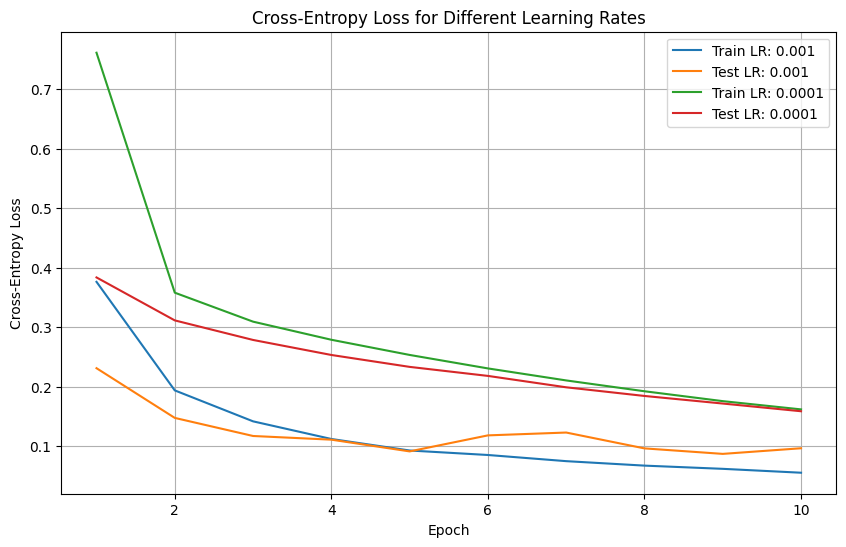

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision.datasets import MNIST
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Hyperparameters
input_size = 784
hidden_size = 128
num_classes = 10
n_epochs = 10
learning_rates = [0.001, 0.0001]  # Two different learning rates

# Load the MNIST dataset
train_dataset = MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)

# Define data loaders
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Define model architecture
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        x = x.view(-1, input_size)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to train a model
def train_model(model, train_loader, criterion, optimizer):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    return running_loss / len(train_loader)

# Function to evaluate a model
def evaluate_model(model, data_loader, criterion):
    model.eval()
    total_loss = 0.0
    total_correct = 0

    with torch.no_grad():
        for images, labels in data_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()

    return total_loss / len(data_loader)

# Train and evaluate models for different learning rates
train_losses = []
test_losses = []

for lr in learning_rates:
    # Initialize model, criterion, and optimizer
    model = Model()
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    # Train the model
    train_losses_lr = []
    test_losses_lr = []
    for epoch in range(n_epochs):
        train_loss = train_model(model, train_loader, criterion, optimizer)
        test_loss = evaluate_model(model, test_loader, criterion)

        train_losses_lr.append(train_loss)
        test_losses_lr.append(test_loss)

        print(f'LR: {lr}, Epoch [{epoch+1}/{n_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

    train_losses.append(train_losses_lr)
    test_losses.append(test_losses_lr)

# Plotting
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(range(1, n_epochs + 1), train_losses[i], label=f'Train LR: {lr}')
    plt.plot(range(1, n_epochs + 1), test_losses[i], label=f'Test LR: {lr}')

plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.title('Cross-Entropy Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()
